<a href="https://colab.research.google.com/github/Bunny1421/knnTrain/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data';
df=pd.read_csv(url,header=None)

In [3]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


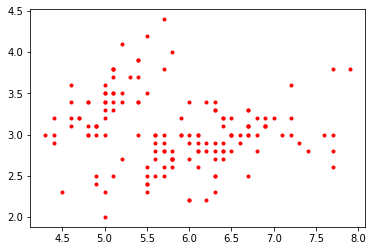

In [4]:
plt.plot(df[0],df[1],'.r');
plt.show()

In [5]:
df[0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: 0, Length: 150, dtype: float64

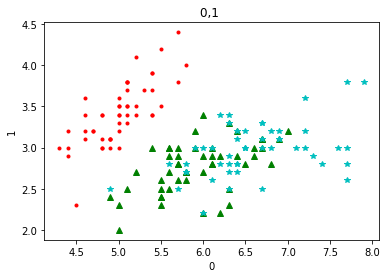

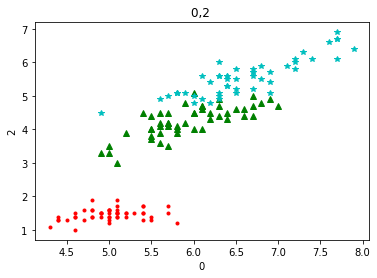

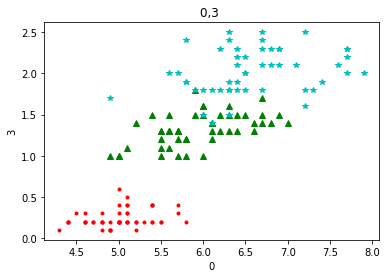

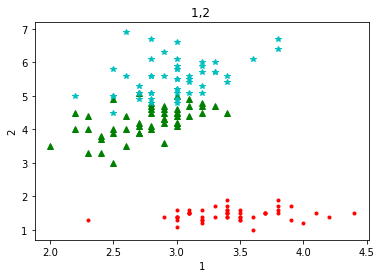

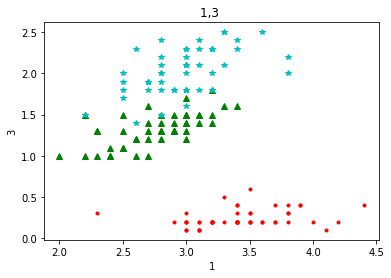

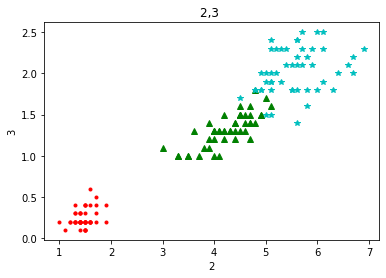

In [6]:
for i in range(4):
    for j in range(4):
        if i !=j and i<j:
            plt.figure()
            plt.plot(df.iloc[:50,i],df.iloc[:50,j],'r.');
            plt.plot(df.iloc[50:100,i],df.iloc[50:100,j],'g^');
            plt.plot(df.iloc[100:,i],df.iloc[100:,j],'c*');
            plt.xlabel(str(i))
            plt.ylabel(str(j))
            
            plt.title("{i},{j} ".format(i=i, j=j))
            plt.show()

In [7]:
for i in range(4):
    for j in range(i+1,4):
        print(i,j)

0 1
0 2
0 3
1 2
1 3
2 3


In [8]:
np.unique(df[4])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
itrain =np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
Xtrain = df.iloc[itrain, :4].values
Xtest = df.iloc[itest ,:4].values
Ytrain = df.iloc[itrain, 4].values
Ytest = df.iloc[itest, 4].values

In [11]:
Xtrain.shape

(75, 4)

In [ ]:
#@title ทดลองการลบarray
a= np.array([[1,2],[3,4],[5,6]])
b=np.array([1,2])

In [ ]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
b

array([1, 2])

In [ ]:

a-b

array([[0, 0],
       [2, 2],
       [4, 4]])

In [ ]:
np.sum(a,axis=1)

array([ 3,  7, 11])

In [12]:
itrain =np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
Xtrain = df.iloc[itrain, :4].values
Xtest = df.iloc[itest ,:4].values
Ytrain = df.iloc[itrain, 4].values
Ytest = df.iloc[itest, 4].values

In [13]:
def nn(Xtest,Xtrain,Ytrain):
    return Ytrain[np.sum((Xtrain - Xtest) ** 2, axis=1).argmin()]

In [14]:
nn(Xtest[0],Xtrain,Ytrain)

'Iris-setosa'

In [15]:
Z = []
for xtest in Xtest:
  Z.append(nn(xtest, Xtrain, Ytrain))
acc = np.sum(np.array(Z) == Ytest) / len(Z) * 100
print(acc)

94.66666666666667


In [19]:
def knn(Xtrain,Ytrain,Xtest,Ytest,k):
    Ytest=[]
    for x in Xtest:
        d=np.sqrt(np.sum((Xtrain-x)**2,axis=1))
        idx=np.argsort(d)
        (values,counts) = np.unique(Ytrain[idx[:k]],return_counts=True)
        ind=np.argmax(counts)
        Ytest.append(values[ind])
    return Ytest

In [ ]:
def knn(xtest, Xtrain, Ytrain, k=1):
  return Ytrain[np.sum((Xtrain - xtest) ** 2, axis=1).argsort()[:k]]

[94.66666666666667, 92.0, 92.0, 94.66666666666667, 92.0, 92.0, 93.33333333333333, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 93.33333333333333, 94.66666666666667, 96.0, 96.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 92.0, 94.66666666666667, 94.66666666666667, 93.33333333333333, 92.0, 92.0, 92.0, 90.66666666666666, 90.66666666666666, 90.66666666666666, 89.33333333333333, 89.33333333333333, 89.33333333333333, 89.33333333333333, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 89.33333333333333, 89.33333333333333, 90.66666666666666, 88.0, 89.33333333333333, 89.33333333333333, 88.0, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 62.66666666666667, 61.33333333333333, 60.0, 60.0, 5

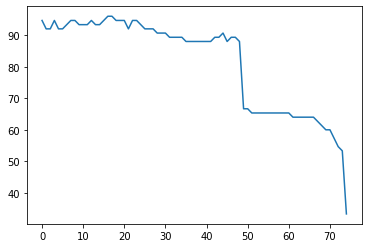

In [20]:
rate=[]
K=range(1,len(Xtrain)+1)

for k in K:
    Ztest=knn(Xtrain,Ytrain,Xtest,Ytest,k)
    rate.append(np.sum(Ztest==Ytest)/len(Ytest)*100)
print(rate)
plt.plot(rate);
plt.show()


In [ ]:
rate = []
Ztest=knn(Xtrain,Ytrain,Xtest,Ytest,17)
rate.append(np.sum(Ztest==Ytest)/len(Ytest)*100)
print(rate)

[96.0]


In [ ]:
max(rate)

96.0

In [ ]:
rate.index(96)

16

In [ ]:
df[0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: 0, Length: 150, dtype: float64

[48.0, 58.666666666666664, 68.0, 65.33333333333333, 69.33333333333334, 64.0, 66.66666666666666, 61.33333333333333, 66.66666666666666, 69.33333333333334, 72.0, 69.33333333333334, 69.33333333333334, 69.33333333333334, 69.33333333333334, 65.33333333333333, 69.33333333333334, 69.33333333333334, 72.0, 68.0, 68.0, 66.66666666666666, 72.0, 68.0, 68.0, 68.0, 66.66666666666666, 68.0, 66.66666666666666, 68.0, 65.33333333333333, 64.0, 65.33333333333333, 69.33333333333334, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 68.0, 68.0, 68.0, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 64.0, 64.0, 66.66666666666666, 64.0, 65.33333333333333, 65.33333333333333, 72.0, 72.0, 69.33333333333334, 69.33333333333334, 69.33333333333334, 69.33333333333334, 54.666666666666664, 56.00000000000001, 54.666666666666664, 50.66666666666667, 52.0, 58.666666666666664, 54.666666666666664, 54.666666666666664, 54.666666666666664,

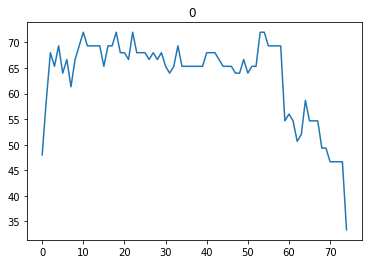

[69.33333333333334, 73.33333333333333, 73.33333333333333, 70.66666666666667, 74.66666666666667, 76.0, 82.66666666666667, 81.33333333333333, 84.0, 81.33333333333333, 82.66666666666667, 80.0, 82.66666666666667, 77.33333333333333, 78.66666666666666, 78.66666666666666, 78.66666666666666, 78.66666666666666, 81.33333333333333, 74.66666666666667, 76.0, 76.0, 74.66666666666667, 76.0, 76.0, 73.33333333333333, 72.0, 73.33333333333333, 74.66666666666667, 72.0, 73.33333333333333, 72.0, 72.0, 73.33333333333333, 72.0, 73.33333333333333, 73.33333333333333, 73.33333333333333, 78.66666666666666, 74.66666666666667, 72.0, 73.33333333333333, 73.33333333333333, 72.0, 73.33333333333333, 72.0, 72.0, 73.33333333333333, 73.33333333333333, 72.0, 72.0, 72.0, 72.0, 73.33333333333333, 73.33333333333333, 72.0, 74.66666666666667, 78.66666666666666, 78.66666666666666, 74.66666666666667, 73.33333333333333, 70.66666666666667, 66.66666666666666, 72.0, 70.66666666666667, 65.33333333333333, 72.0, 73.33333333333333, 64.0, 

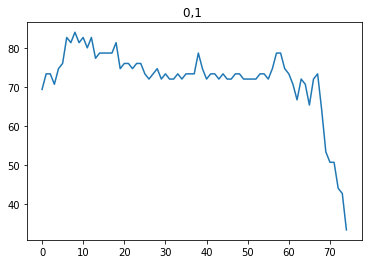

[92.0, 92.0, 93.33333333333333, 92.0, 94.66666666666667, 90.66666666666666, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 92.0, 93.33333333333333, 90.66666666666666, 92.0, 89.33333333333333, 93.33333333333333, 90.66666666666666, 90.66666666666666, 89.33333333333333, 89.33333333333333, 88.0, 88.0, 88.0, 88.0, 89.33333333333333, 88.0, 88.0, 88.0, 88.0, 88.0, 86.66666666666667, 89.33333333333333, 84.0, 86.66666666666667, 86.66666666666667, 85.33333333333334, 86.66666666666667, 86.66666666666667, 65.33333333333333, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0,

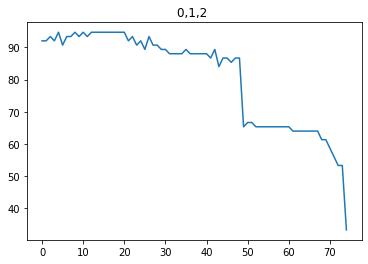

[93.33333333333333, 92.0, 92.0, 90.66666666666666, 96.0, 92.0, 93.33333333333333, 93.33333333333333, 96.0, 92.0, 94.66666666666667, 92.0, 93.33333333333333, 92.0, 93.33333333333333, 90.66666666666666, 89.33333333333333, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 89.33333333333333, 89.33333333333333, 89.33333333333333, 88.0, 89.33333333333333, 88.0, 90.66666666666666, 86.66666666666667, 88.0, 88.0, 88.0, 86.66666666666667, 88.0, 86.66666666666667, 86.66666666666667, 86.66666666666667, 86.66666666666667, 84.0, 84.0, 81.33333333333333, 82.66666666666667, 80.0, 84.0, 81.33333333333333, 82.66666666666667, 80.0, 77.33333333333333, 76.0, 73.33333333333333, 73.33333333333333, 73.33333333333333, 69.33333333333334, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 64.0, 66.66666666666666, 66.66666666666666, 64.0, 64.0, 61.33333333333333, 46.666666666666664, 46.666666666666664, 46.666666666666664, 46.666666666666664

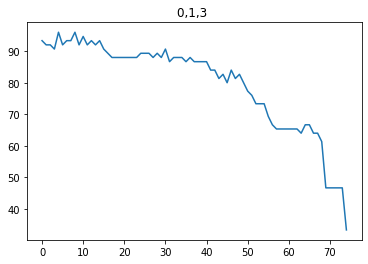

[93.33333333333333, 90.66666666666666, 94.66666666666667, 92.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 92.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 94.66666666666667, 90.66666666666666, 93.33333333333333, 92.0, 90.66666666666666, 90.66666666666666, 89.33333333333333, 89.33333333333333, 89.33333333333333, 90.66666666666666, 90.66666666666666, 90.66666666666666, 89.33333333333333, 89.33333333333333, 90.66666666666666, 88.0, 88.0, 88.0, 88.0, 86.66666666666667, 88.0, 86.66666666666667, 86.66666666666667, 81.33333333333333, 86.66666666666667, 84.0, 86.66666666666667, 85.33333333333334, 85.33333333333334, 86.66666666666667, 85.33333333333334, 64.0, 64.0, 65.33333333333333, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 61.33333333333333, 60.0, 57.333333333333336, 54.6666666666

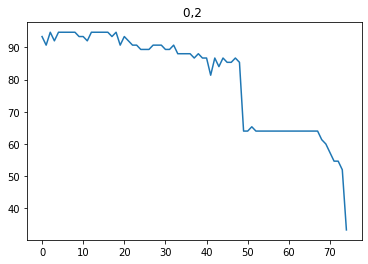

[96.0, 92.0, 96.0, 94.66666666666667, 93.33333333333333, 94.66666666666667, 96.0, 94.66666666666667, 96.0, 96.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 94.66666666666667, 96.0, 96.0, 94.66666666666667, 92.0, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 92.0, 92.0, 92.0, 89.33333333333333, 90.66666666666666, 90.66666666666666, 92.0, 89.33333333333333, 92.0, 89.33333333333333, 88.0, 88.0, 88.0, 88.0, 89.33333333333333, 88.0, 88.0, 88.0, 89.33333333333333, 88.0, 86.66666666666667, 88.0, 88.0, 65.33333333333333, 65.33333333333333, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 62.66666666666667, 62.66666666666667, 60.0, 60.0, 57.333333333333336, 57.333333333333336, 56.00000000000001, 53.333333333333336, 33.33333333333333]


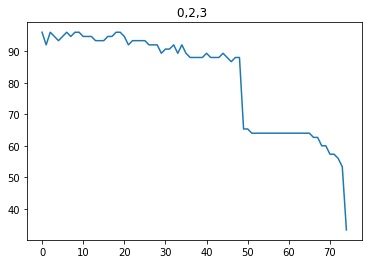

[88.0, 90.66666666666666, 94.66666666666667, 92.0, 97.33333333333334, 96.0, 97.33333333333334, 96.0, 96.0, 94.66666666666667, 94.66666666666667, 92.0, 92.0, 92.0, 93.33333333333333, 90.66666666666666, 92.0, 90.66666666666666, 92.0, 90.66666666666666, 90.66666666666666, 88.0, 86.66666666666667, 86.66666666666667, 86.66666666666667, 85.33333333333334, 88.0, 86.66666666666667, 88.0, 86.66666666666667, 88.0, 86.66666666666667, 86.66666666666667, 86.66666666666667, 86.66666666666667, 84.0, 85.33333333333334, 84.0, 82.66666666666667, 82.66666666666667, 82.66666666666667, 81.33333333333333, 80.0, 81.33333333333333, 80.0, 78.66666666666666, 84.0, 84.0, 82.66666666666667, 78.66666666666666, 70.66666666666667, 66.66666666666666, 68.0, 66.66666666666666, 64.0, 62.66666666666667, 61.33333333333333, 60.0, 60.0, 60.0, 61.33333333333333, 60.0, 61.33333333333333, 62.66666666666667, 61.33333333333333, 61.33333333333333, 57.333333333333336, 56.00000000000001, 53.333333333333336, 46.666666666666664, 46.6

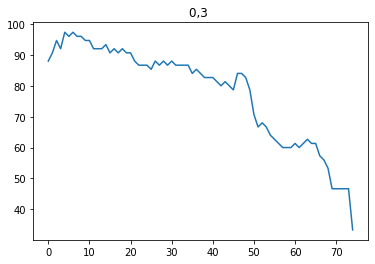

[42.66666666666667, 48.0, 46.666666666666664, 52.0, 48.0, 45.33333333333333, 45.33333333333333, 48.0, 50.66666666666667, 52.0, 52.0, 45.33333333333333, 41.333333333333336, 45.33333333333333, 49.333333333333336, 49.333333333333336, 53.333333333333336, 49.333333333333336, 52.0, 53.333333333333336, 50.66666666666667, 53.333333333333336, 53.333333333333336, 57.333333333333336, 60.0, 60.0, 60.0, 56.00000000000001, 57.333333333333336, 61.33333333333333, 61.33333333333333, 57.333333333333336, 57.333333333333336, 57.333333333333336, 57.333333333333336, 60.0, 60.0, 60.0, 62.66666666666667, 56.00000000000001, 56.00000000000001, 56.00000000000001, 56.00000000000001, 56.00000000000001, 56.00000000000001, 56.00000000000001, 56.00000000000001, 52.0, 57.333333333333336, 53.333333333333336, 53.333333333333336, 53.333333333333336, 61.33333333333333, 57.333333333333336, 57.333333333333336, 57.333333333333336, 57.333333333333336, 61.33333333333333, 61.33333333333333, 61.33333333333333, 61.33333333333333,

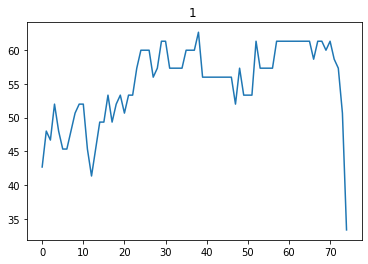

[93.33333333333333, 92.0, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 92.0, 93.33333333333333, 92.0, 92.0, 92.0, 92.0, 92.0, 93.33333333333333, 92.0, 92.0, 93.33333333333333, 92.0, 92.0, 86.66666666666667, 89.33333333333333, 86.66666666666667, 89.33333333333333, 86.66666666666667, 92.0, 92.0, 92.0, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.

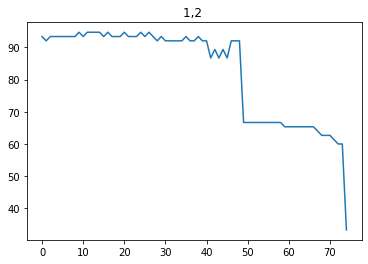

[94.66666666666667, 96.0, 97.33333333333334, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 92.0, 92.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 92.0, 92.0, 90.66666666666666, 92.0, 90.66666666666666, 92.0, 90.66666666666666, 93.33333333333333, 92.0, 93.33333333333333, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 6

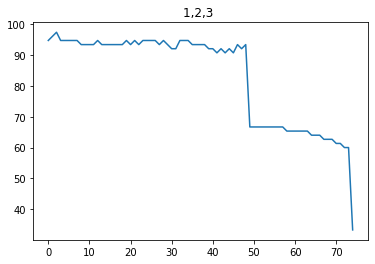

[92.0, 92.0, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 96.0, 96.0, 94.66666666666667, 96.0, 96.0, 96.0, 96.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 92.0, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 92.0, 92.0, 92.0, 92.0, 92.0, 93.33333333333333, 92.0, 90.66666666666666, 90.66666666666666, 88.0, 88.0, 86.66666666666667, 92.0, 72.0, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 66.66666666666666, 68.0, 68.0, 68.0, 66.66666666666666, 66

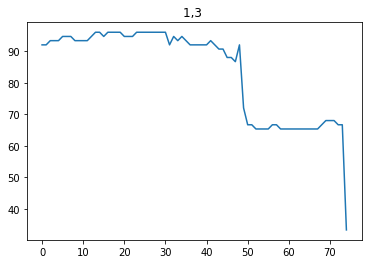

[93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 89.33333333333333, 93.33333333333333, 89.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 92.0, 92.0, 92.0, 88.0, 88.0, 85.33333333333334, 85.33333333333334, 85.33333333333334, 88.0, 89.33333333333333, 88.0, 85.33333333333334, 88.0, 65.33333333333333, 66.66666666666666, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 6

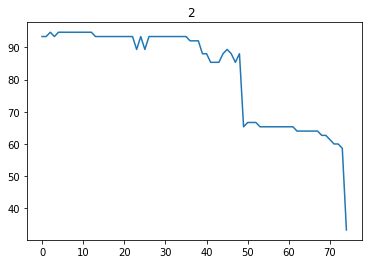

[93.33333333333333, 93.33333333333333, 94.66666666666667, 94.66666666666667, 97.33333333333334, 98.66666666666667, 96.0, 98.66666666666667, 96.0, 96.0, 96.0, 96.0, 96.0, 94.66666666666667, 93.33333333333333, 92.0, 92.0, 94.66666666666667, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 93.33333333333333, 94.66666666666667, 90.66666666666666, 90.66666666666666, 90.66666666666666, 90.66666666666666, 90.66666666666666, 94.66666666666667, 90.66666666666666, 93.33333333333333, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 65.33333333333333, 65.33333333333333, 65.33333333333333, 65.33333333333333, 6

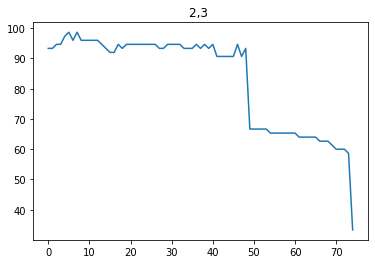

[86.66666666666667, 88.0, 94.66666666666667, 96.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 94.66666666666667, 96.0, 96.0, 96.0, 96.0, 96.0, 94.66666666666667, 96.0, 96.0, 96.0, 94.66666666666667, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 94.66666666666667, 96.0, 94.66666666666667, 94.66666666666667, 94.66666666666667, 96.0, 96.0, 96.0, 96.0, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 62.66666666666667, 62.66666666666667, 62.66666666666667, 62.66666666666667, 62.66666666666667, 62.66666666666667, 60.0, 60.0, 60.0, 60.0, 54.666666666666664, 54.666666666666664, 54.666666666666664, 54.666666666666664, 54.666666666666664, 54.666666666666664, 33.33333333333333]


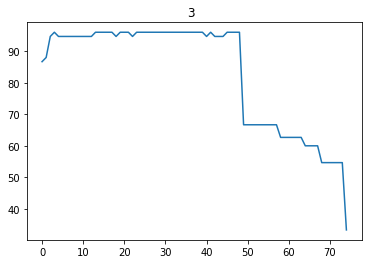

In [ ]:
for i in range(4):
    itrain =np.r_[:25, 50:75, 100:125]
    itest = np.r_[25:50, 75:100, 125:150]
    Xtrain = df.iloc[itrain, [i]].values
    Xtest = df.iloc[itest , [i]].values
    Ytrain = df.iloc[itrain, 4].values
    Ytest = df.iloc[itest, 4].values

    rate=[]
    K=range(1,len(Xtrain)+1)

    for k in K:
        Ztest=knn(Xtrain,Ytrain,Xtest,Ytest,k)
        rate.append(np.sum(Ztest==Ytest)/len(Ytest)*100)
    print(rate)
    plt.title("{i} ".format(i=i))
    plt.plot(rate);
    plt.show()
    for j in range(i+1 , 4):
        itrain =np.r_[:25, 50:75, 100:125]
        itest = np.r_[25:50, 75:100, 125:150]
        Xtrain = df.iloc[itrain, [i,j]].values
        Xtest = df.iloc[itest , [i,j]].values
        Ytrain = df.iloc[itrain, 4].values
        Ytest = df.iloc[itest, 4].values

        rate=[]
        K=range(1,len(Xtrain)+1)

        for k in K:
            Ztest=knn(Xtrain,Ytrain,Xtest,Ytest,k)
            rate.append(np.sum(Ztest==Ytest)/len(Ytest)*100)
        print(rate)
        plt.title("{i},{j} ".format(i=i, j=j))
        plt.plot(rate);
        plt.show()
        for kk in range(j+1,4):
            itrain =np.r_[:25, 50:75, 100:125]
            itest = np.r_[25:50, 75:100, 125:150]
            Xtrain = df.iloc[itrain, [i,j,kk]].values
            Xtest = df.iloc[itest , [i,j,kk]].values
            Ytrain = df.iloc[itrain, 4].values
            Ytest = df.iloc[itest, 4].values

            rate=[]
            K=range(1,len(Xtrain)+1)

            for k in K:
                Ztest=knn(Xtrain,Ytrain,Xtest,Ytest,k)
                rate.append(np.sum(Ztest==Ytest)/len(Ytest)*100)
            print(rate)
            plt.title("{i},{j},{kk} ".format(i=i, j=j,kk=kk))
            plt.plot(rate);
            plt.show()



In [23]:
for i in range(4):
    print(i)
    for j in range(i+1,4):
        print(i,j)
        for k in range(j+1,4):
            print(i,j,k)

0
0 1
0 1 2
0 1 3
0 2
0 2 3
0 3
1
1 2
1 2 3
1 3
2
2 3
3


In [24]:
n=4
for j in range(1,2**n):
    b=[]
    for i in range(4):
        b.append(j//2**i%2)
    b = np.array(b).astype(bool)
    print(b)

[ True False False False]
[False  True False False]
[ True  True False False]
[False False  True False]
[ True False  True False]
[False  True  True False]
[ True  True  True False]
[False False False  True]
[ True False False  True]
[False  True False  True]
[ True  True False  True]
[False False  True  True]
[ True False  True  True]
[False  True  True  True]
[ True  True  True  True]
